## NLP Class 2

### Tokenization, Stemming & Lemmatization, Part-of-speech Tagging

In [1]:
import nltk
# nltk.download('popular', halt_on_error=False)
nltk.download('all', halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\yomaa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\yomaa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\yomaa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\yomaa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\yomaa\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [2]:
import os, requests, sys
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import re

In [3]:
print(sys.version)

3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]


In [4]:
text = "Flu season hitting earlier, with dozens more outbreaks — and more severe symptoms"
tokens = nltk.tokenize.word_tokenize(text)
print(tokens)

['Flu', 'season', 'hitting', 'earlier', ',', 'with', 'dozens', 'more', 'outbreaks', '—', 'and', 'more', 'severe', 'symptoms']


#### Copy source data from GCS into local FS

In [5]:
def get_gcs_data (bucket_name, folder_name, file_name, local_folder_name):
    url = 'https://storage.googleapis.com/' + bucket_name + '/' + folder_name + '/' + file_name
    r = requests.get(url)
    open(local_folder_name + '/' + file_name , 'wb').write(r.content)

In [6]:
bucket_name = 'msca-bdp-data-open'
folder_name = 'books'
file_name = ['3boat10.txt']
local_folder_name = '/home/jupyter/data/books/'

os.makedirs(local_folder_name, exist_ok=True)

for file in file_name:
    get_gcs_data (bucket_name = bucket_name,
                 folder_name = folder_name,
                 file_name = file,
                 local_folder_name = local_folder_name)
    print('Downloaded: ' + file)

Downloaded: 3boat10.txt


#### Get most frequent words in a book

In [7]:
file_path = local_folder_name + file_name[0]
f = open(file_path)
bk_3boat = f.read()

words = nltk.tokenize.word_tokenize(bk_3boat)
fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 7773 samples and 79641 outcomes>


[(',', 5702),
 ('the', 3338),
 ('and', 3215),
 ('.', 3081),
 ('to', 1748),
 ('a', 1621),
 ('of', 1425),
 ('I', 1208),
 ('it', 1159),
 ('in', 931)]

#### Get most frequent clean words in a book

In [8]:
#from nltk.corpus import stopwords

#default_stopwords = set(nltk.corpus.stopwords.words('english'))

words = nltk.tokenize.word_tokenize(bk_3boat)

#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
#words = [word for word in words if not word.isnumeric()]

# Remove punctuation
words = [word for word in words if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words_lc = [word.lower() for word in words]

# Remove stopwords
words_lc = [word for word in words_lc if word not in stopwords]

# Remove stopwords
# words = [word for word in words if word not in stopwords]


fdist = nltk.FreqDist(words_lc)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 6240 samples and 29842 outcomes>


[('said', 378),
 ('would', 362),
 ('harris', 316),
 ('george', 308),
 ('one', 246),
 ('us', 228),
 ('boat', 186),
 ('get', 179),
 ('could', 175),
 ('got', 163)]

#### We have to instantiate a Text object first, and then call it on that object.

In [9]:
textList = Text(nltk.corpus.gutenberg.words(file_path))

#### A concordance view shows us every occurrence of a given word, together with some context.

In [10]:
textList.concordance("boat")

Displaying 25 of 199 matches:
THREE MEN IN A BOAT ( TO SAY NOTHING OF THE DOG ). Three
NOTHING OF THE DOG ). Three Men in a Boat by Jerome K . Jerome CHAPTER I . THR
ty of people very bad indeed , whole boat - loads of them ; but I never met a 
 like a fellow I saw on the Yarmouth boat one day , I could account for the se
ckles I ever tasted in a respectable boat . Did you have any ?" For myself , I
eep , you get fooling about with the boat , and slop me overboard . If you ask
o down in the morning , and take the boat up to Chertsey , and George , who wo
n stillness . Then we run our little boat into some quiet nook , and the tent 
talk , the river , playing round the boat , prattles strange old tales and sec
is a good two inches of water in the boat , and all the things are damp . You 
rd man , who has been baling out the boat , and who has spilled the water down
uld not allow of the navigation of a boat sufficiently large to take the thing
eople , on that voyage , load up the boat ti

In [11]:
textList.concordance("water")

Displaying 25 of 88 matches:
 thin , not the captain ) and soda - water ; but , towards Saturday , he got up
night ," and , lulled by the lapping water and the rustling trees , we fall asl
 , and there is a good two inches of water in the boat , and all the things are
t the boat , and who has spilled the water down his sleeve , and has been cursi
 good , plain merchandise will stand water . You will have time to think as wel
hen they are going anywhere near the water , but that they don ' t bathe much w
 , shivering , through six inches of water . And when I do get to the sea , it 
 swimming for my life in two feet of water . I hop back and dress , and crawl h
of Harris ' s , which you mixed with water and called lemonade , plenty of tea 
orted . " Now we shan ' t get on the water till after twelve . I wonder you tak
on , and prognosticate drought , and water famine , and sunstroke , and simooms
the lower part of the town was under water , owing to the river having overflow
ident he wa

In [12]:
textList.concordance("dog")

Displaying 25 of 31 matches:
MEN IN A BOAT ( TO SAY NOTHING OF THE DOG ). Three Men in a Boat by Jerome K . 
ed up at me , and think : " Oh , that dog will never live . He will be snatched
t door but one for having a ferocious dog at large , that had kept him pinned u
e and someone to love you , a cat , a dog , and a pipe or two , enough to eat a
ed him . I didn ' t encourage him . A dog like that don ' t want any encouragem
 with eggs and bacon , irritating the dog , or flirting with the slavey , inste
dly . He would take bronchitis in the dog - days , and have hay - fever at Chri
by the lady of the house ? That china dog that ornaments the bedroom of my furn
my furnished lodgings . It is a white dog . Its eyes blue . Its nose is a delic
me it is more than probable that that dog will be dug up from somewhere or othe
s age , do not see the beauty of that dog . We are too familiar with it . It is
o our eyes . So it is with that china dog . In 2288 people will gush over it . 
 one anothe

#### Using "similar" helps us discover what other words appear in a similar range of contexts

In [13]:
textList.similar("boat")

river man thing time water night day bank lock way morning things boy
room matter world air city business kettle


In [14]:
textList.similar("water")

river boat thing time room bank morning night man things sea lock it
other way place house subject them matter


In [15]:
textList.similar("dog")

bit man long morning change dream body widow party trout boat harris
hundred rest week river mean he out is


#### Positional information helps determine the location of a word in the text: how many words from the beginning it appears

In [16]:
import matplotlib
%matplotlib inline  

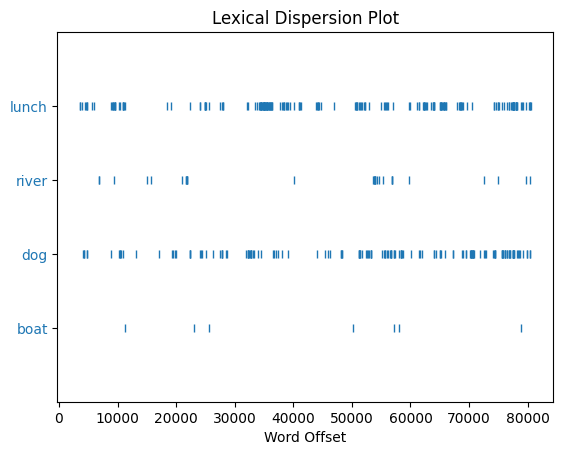

In [17]:
textList.dispersion_plot(["boat", "dog", "river", "lunch"])

#### By default tokenization includes all surrounting punctuation charachters

In [18]:
len(textList)

81185

#### We can invoke RegexpTokenizer to eliminate punctuation

In [19]:
#This will match any word characters until it reaches a non-word character, like a space
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(bk_3boat)

len(tokens)

68364

#### Measuring lexical diversity: dividing unique words by overall words

In [20]:
len(set(textList)) / len(textList)

0.09222146948327893

In [21]:
def lex_diversity_pct(text):
    return (len(set(textList)) / len(textList))*100

In [22]:
lex_diversity_pct(textList)

9.222146948327893

## Text normalization with stemming and lemmatization

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

    am, are, is =>  be
    dog, dogs, dog's, dogs' => dog

The result of this mapping of text will be something like:

    the girl's dogs are different breeds => the girl dog be differ breed 

In [ ]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

#### Converting lists to strings to simplify displaying / visualization

In [ ]:
words_l = (words_lc[0:50])
words_s = ', '.join(words_l)
type (words_s)

str

#### Original tokens

In [ ]:
print (words_l)

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


#### Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

In [ ]:
print([porter.stem(t) for t in words_lc[0:50]])

['three', 'men', 'boat', 'say', 'noth', 'dog', 'three', 'men', 'boat', 'jerom', 'jerom', 'chapter', 'three', 'invalid', 'suffer', 'georg', 'harri', 'victim', 'one', 'hundr', 'seven', 'fatal', 'maladi', 'use', 'prescript', 'cure', 'liver', 'complaint', 'children', 'agre', 'overwork', 'need', 'rest', 'week', 'roll', 'deep', 'georg', 'suggest', 'river', 'montmor', 'lodg', 'object', 'origin', 'motion', 'carri', 'major', 'three', 'one', 'four', 'us']


In [ ]:
print([lancaster.stem(t) for t in words_lc[0:50]])

['three', 'men', 'boat', 'say', 'noth', 'dog', 'three', 'men', 'boat', 'jerom', 'jerom', 'chapt', 'three', 'invalid', 'suff', 'georg', 'har', 'victim', 'on', 'hundr', 'sev', 'fat', 'malady', 'us', 'prescrib', 'cur', 'liv', 'complaint', 'childr', 'agr', 'overwork', 'nee', 'rest', 'week', 'rol', 'deep', 'georg', 'suggest', 'riv', 'montm', 'lodg', 'object', 'origin', 'mot', 'carry', 'maj', 'three', 'on', 'four', 'us']


#### Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. The dictionary checking makes lemmatizers significantly slower than stemmers

In [ ]:
print (words_l)

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


In [ ]:
wnl = nltk.WordNetLemmatizer()

In [ ]:
print([wnl.lemmatize(t) for t in words_lc[0:50]])

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalid', 'suffering', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'malady', 'useful', 'prescription', 'cure', 'liver', 'complaint', 'child', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodge', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'u']


## Part of Speech Tagging

#### Can use help function to get explanations of endividual tags

In [ ]:
uc1 = "The University of Chicago is a private research university in Chicago, Illinois"
uc2 = "It is one of the world's leading and most influential institutions of higher learning, with top-ten positions in numerous rankings and measures"

In [ ]:
text = nltk.tokenize.word_tokenize(uc1)
nltk.pos_tag(text)

[('The', 'DT'),
 ('University', 'NNP'),
 ('of', 'IN'),
 ('Chicago', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('private', 'JJ'),
 ('research', 'NN'),
 ('university', 'NN'),
 ('in', 'IN'),
 ('Chicago', 'NNP'),
 (',', ','),
 ('Illinois', 'NNP')]

In [ ]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [ ]:
text = nltk.tokenize.word_tokenize(uc2)
nltk.pos_tag(text)

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ("'s", 'POS'),
 ('leading', 'JJ'),
 ('and', 'CC'),
 ('most', 'JJS'),
 ('influential', 'JJ'),
 ('institutions', 'NNS'),
 ('of', 'IN'),
 ('higher', 'JJR'),
 ('learning', 'NN'),
 (',', ','),
 ('with', 'IN'),
 ('top-ten', 'JJ'),
 ('positions', 'NNS'),
 ('in', 'IN'),
 ('numerous', 'JJ'),
 ('rankings', 'NNS'),
 ('and', 'CC'),
 ('measures', 'NNS')]

In [ ]:
nltk.help.upenn_tagset('CC')

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


In [ ]:
#list all possible tags and values
# nltk.help.upenn_tagset('.*')

## Reading from URL
#### BeautifulSoup to clean up meta-tags 

In [ ]:
# !pip install bs4

In [ ]:
url = "https://en.wikipedia.org/wiki/University_of_Chicago"

from bs4 import BeautifulSoup
import urllib.request
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page.read(), "lxml")

In [ ]:
uc_wiki = (soup.get_text())
#print (type(uc_wiki))
print (uc_wiki[6910:9000]) 

for classes on October 1, 1892.[39]  Harper worked on building up the faculty and in two years he had a faculty of 120, including eight former university or college presidents.[44]  Harper was an accomplished scholar (Semiticist) and a member of the Baptist clergy who believed that a great university should maintain the study of faith as a central focus.[45] To fulfill this commitment, he brought the Baptist seminary that had begun as an independent school "alongside" the Old University of Chicago and separated from the old school decades earlier to Morgan Park. This became the Divinity School in 1891, the first professional school at the University of Chicago.[35]: 20–22 
Harper recruited acclaimed Yale baseball and football player Amos Alonzo Stagg from the Young Men's Christian Association training school at Springfield to coach the school's football program. Stagg was given a position on the faculty, the first such athletic position in the United States. While coaching at the unive

#### Even after BeautifulSoup we are left with a lot of garbade - mostly punctuation

In [ ]:
uc_wiki_tokens = nltk.tokenize.word_tokenize(uc_wiki)
uc_wiki_tokens_uncleaned = uc_wiki_tokens
print (uc_wiki_tokens[2000:2100])

['of', 'Chicago', 'team', 'that', 'worked', 'on', 'the', 'production', 'of', 'the', 'world', "'s", 'first', 'human-caused', 'self-sustaining', 'nuclear', 'reaction', ',', 'including', 'Enrico', 'Fermi', 'in', 'the', 'front', 'row', 'and', 'Leó', 'Szilárd', 'in', 'the', 'second', '.', 'Money', 'that', 'had', 'been', 'raised', 'during', 'the', '1920s', 'and', 'financial', 'backing', 'from', 'the', 'Rockefeller', 'Foundation', 'helped', 'the', 'school', 'to', 'survive', 'through', 'the', 'Great', 'Depression', '.', '[', '54', ']', 'Nonetheless', ',', 'in', '1933', ',', 'Hutchins', 'proposed', 'an', 'unsuccessful', 'plan', 'to', 'merge', 'the', 'University', 'of', 'Chicago', 'and', 'Northwestern', 'University', 'into', 'a', 'single', 'university', '.', '[', '57', ']', 'During', 'World', 'War', 'II', ',', 'the', 'university', "'s", 'Metallurgical', 'Laboratory', 'made', 'ground-breaking', 'contributions']


In [ ]:
#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
uc_wiki_tokens = [word for word in uc_wiki_tokens if len(word) > 1]

# Remove punctuation
uc_wiki_tokens = [word for word in uc_wiki_tokens if word.isalpha()]

# Remove stopwords
uc_wiki_tokens_no_stopwords = [word for word in uc_wiki_tokens if word not in stopwords]

fdist = nltk.FreqDist(uc_wiki_tokens_no_stopwords)

fdist.most_common(10)

[('University', 329),
 ('Chicago', 321),
 ('The', 198),
 ('Retrieved', 177),
 ('Archived', 137),
 ('original', 134),
 ('university', 129),
 ('School', 76),
 ('College', 73),
 ('September', 57)]

### Comparing the results of our cleaned web scrape

#### Cleanest version with all noise and stopwords removed

In [ ]:
uc_wiki_text_no_stopwords = nltk.Text(uc_wiki_tokens_no_stopwords)
print (uc_wiki_text_no_stopwords[:100])

['University', 'Chicago', 'Wikipedia', 'University', 'Chicago', 'From', 'Wikipedia', 'free', 'encyclopedia', 'Jump', 'navigation', 'Jump', 'search', 'Private', 'university', 'Chicago', 'Illinois', 'The', 'University', 'ChicagoLatin', 'Universitas', 'ChicaginiensisMottoCrescat', 'scientia', 'vita', 'excolatur', 'Latin', 'Motto', 'English', 'Let', 'knowledge', 'grow', 'human', 'life', 'enriched', 'TypePrivate', 'research', 'AccreditationHLCAcademic', 'billion', 'PresidentA', 'Paul', 'AlivisatosProvostKa', 'Yee', 'Christina', 'LeeAcademic', 'Administrative', 'including', 'employees', 'The', 'University', 'Chicago', 'Medical', 'Center', 'LocationChicago', 'Illinois', 'United', 'City', 'acres', 'ha', 'main', 'campus', 'Warren', 'Woods', 'Ecological', 'Field', 'Station', 'Warren', 'Woods', 'State', 'Park', 'acres', 'ha', 'NewspaperThe', 'Chicago', 'MaroonColors', 'Maroon', 'NicknameMaroonsSporting', 'affiliationsNCAA', 'Division', 'III', 'UAAMascotPhil', 'The', 'University', 'Chicago', 'UChi

#### Modest cleaning - only punctuation and noise - all stopwords left intact

In [ ]:
uc_wiki_text_cleaned = nltk.Text(uc_wiki_tokens)
print (uc_wiki_text_cleaned[:100])

['University', 'of', 'Chicago', 'Wikipedia', 'University', 'of', 'Chicago', 'From', 'Wikipedia', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Private', 'university', 'in', 'Chicago', 'Illinois', 'The', 'University', 'of', 'ChicagoLatin', 'Universitas', 'ChicaginiensisMottoCrescat', 'scientia', 'vita', 'excolatur', 'Latin', 'Motto', 'in', 'English', 'Let', 'knowledge', 'grow', 'from', 'more', 'to', 'more', 'and', 'so', 'be', 'human', 'life', 'enriched', 'TypePrivate', 'research', 'AccreditationHLCAcademic', 'billion', 'PresidentA', 'Paul', 'AlivisatosProvostKa', 'Yee', 'Christina', 'LeeAcademic', 'Administrative', 'including', 'employees', 'of', 'The', 'University', 'of', 'Chicago', 'Medical', 'Center', 'LocationChicago', 'Illinois', 'United', 'City', 'acres', 'ha', 'main', 'campus', 'Warren', 'Woods', 'Ecological', 'Field', 'Station', 'Warren', 'Woods', 'State', 'Park', 'acres', 'ha', 'NewspaperThe', 'Chicago', 'MaroonColors', 'Maroon', 'NicknameM

#### No cleaning done

In [ ]:
uc_wiki_text_raw = nltk.Text(uc_wiki_tokens_uncleaned)
print (uc_wiki_text_raw[:100])

['University', 'of', 'Chicago', '-', 'Wikipedia', 'University', 'of', 'Chicago', 'From', 'Wikipedia', ',', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'Private', 'university', 'in', 'Chicago', ',', 'Illinois', 'The', 'University', 'of', 'ChicagoLatin', ':', 'Universitas', 'ChicaginiensisMottoCrescat', 'scientia', ';', 'vita', 'excolatur', '(', 'Latin', ')', 'Motto', 'in', 'English', "''", 'Let', 'knowledge', 'grow', 'from', 'more', 'to', 'more', ';', 'and', 'so', 'be', 'human', 'life', 'enriched', '.', '``', '[', '1', ']', 'TypePrivate', 'research', 'universityEstablished1890', '[', '1856', ']', '(', '1890', '[', '1856', ']', ')', '[', '1', ']', '[', '2', ']', 'AccreditationHLCAcademic', 'affiliationsAAUNAICUURASpace-grantEndowment', '$', '11.6', 'billion', '(', '2021', ')', '[', '3', ']', 'PresidentA', '.', 'Paul', 'AlivisatosProvostKa', 'Yee', 'Christina', 'LeeAcademic', 'staff2,859']


### Applying simlarity function - which option produces best results?

#### Cleanest version with all noise and stopwords removed

In [ ]:
uc_wiki_text_no_stopwords.similar('university')

site chicago illinois the campus maroon uchicago located college
science history arts sororities buildings classes reputation economist
chairman kind spurs


#### Modest cleaning - only punctuation and noise - all stopwords left intact

In [ ]:
uc_wiki_text_cleaned.similar('university')

college class chicago world school faculty board campus history arts
law as development president professor study institute office team
site


#### No cleaning done

In [ ]:
uc_wiki_text_raw.similar('university')

college class chicago world school faculty board campus arts law as
development history president professor study institute office site
new


### Tagging our web page with POS

#### In order for the tagger to be effective, it has to tag each word based on the word itself, as well as its context within a sentence. 
Depending on your corpus, certain taggers perform better the others.  Like with SPSS TA dictionaries, you can start with pre-trained POS Tagger and then try multiple different options to see which one will perform best for you.
You can also customize and train your own taggers to match your particular corpus

In [ ]:
uc_wiki_tagged = nltk.pos_tag(uc_wiki_text_cleaned)

In [ ]:
type(uc_wiki_tagged)

list

In [ ]:
uc_wiki_tagged[:10]

[('University', 'NNP'),
 ('of', 'IN'),
 ('Chicago', 'NNP'),
 ('Wikipedia', 'NNP'),
 ('University', 'NNP'),
 ('of', 'IN'),
 ('Chicago', 'NNP'),
 ('From', 'NNP'),
 ('Wikipedia', 'NNP'),
 ('the', 'DT')]

## Exploring alternative text analysis packages: TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob(uc_wiki)

#### Part of speech tagging

In [ ]:
blob.tags[200:220]

[('9', 'CD'),
 (']', 'VBD'),
 ('The', 'DT'),
 ('University', 'NNP'),
 ('of', 'IN'),
 ('Chicago', 'NNP'),
 ('is', 'VBZ'),
 ('consistently', 'RB'),
 ('ranked', 'VBN'),
 ('among', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('universities', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('[', 'VBZ'),
 ('10', 'CD'),
 (']', 'NN'),
 ('[', 'VBD')]

#### To process  cleaned-up version from NLTK we will have to convert text from nltk.text.Text to String

In [ ]:
type(uc_wiki_text_cleaned)

nltk.text.Text

In [ ]:
words_list = (uc_wiki_text_cleaned[0:])
words_string = ', '.join(words)
print(type(words_list))
print(type(words_string))

<class 'list'>
<class 'str'>


In [ ]:
blob = TextBlob(words_string)

#### POS Tagging with TextBlob

In [ ]:
blob.tags[70:90]

[('TO', 'NNP'),
 ('ONE', 'NNP'),
 ('THERE', 'NNP'),
 ('were', 'VBD'),
 ('four', 'CD'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('George', 'NNP'),
 ('and', 'CC'),
 ('William', 'NNP'),
 ('Samuel', 'NNP'),
 ('Harris', 'NNP'),
 ('and', 'CC'),
 ('myself', 'PRP'),
 ('and', 'CC'),
 ('Montmorency', 'NNP'),
 ('We', 'PRP'),
 ('were', 'VBD'),
 ('sitting', 'VBG'),
 ('in', 'IN')]

In [ ]:
words = nltk.tokenize.word_tokenize(bk_3boat)
words_string = ', '.join(words)
blob = TextBlob(words_string)

blob.tags[80:100]

[('four', 'CD'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('George', 'NNP'),
 ('and', 'CC'),
 ('William', 'NNP'),
 ('Samuel', 'NNP'),
 ('Harris', 'NNP'),
 ('and', 'CC'),
 ('myself', 'PRP'),
 ('and', 'CC'),
 ('Montmorency', 'NNP'),
 ('We', 'PRP'),
 ('were', 'VBD'),
 ('sitting', 'VBG'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('room', 'NN'),
 ('smoking', 'NN'),
 ('and', 'CC')]

#### Tripping on the capitalized header

In [ ]:
blob.tags[:10]

[('THREE', 'CD'),
 ('MEN', 'NNP'),
 ('IN', 'NNP'),
 ('A', 'NNP'),
 ('BOAT', 'NNP'),
 ('TO', 'NNP'),
 ('SAY', 'NNP'),
 ('NOTHING', 'NNP'),
 ('OF', 'NNP'),
 ('THE', 'NNP')]

#### Extracting Nouns

In [ ]:
blob.noun_phrases[:50]

WordList(['three', 'men', 'in', 'boat', 'to', 'say', 'nothing', 'of', 'the', 'dog', 'men', 'boat', 'jerome', 'k.', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'of', 'george', 'and', 'harris', 'victim', 'to', 'one', 'hundred', 'and', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'for', 'liver', 'complaint', 'in', 'children', 'we', 'agree', 'that', 'we', 'are', 'overworked', 'and', 'need', 'rest', 'week', 'on'])

#### Be careful with embedded functions to pluralize and singularize the words

In [ ]:
s1 = TextBlob(words_s)

In [ ]:
print(words_l[:1000])

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


In [ ]:
s1.words[:100].singularize()

WordList(['three', 'man', 'boat', 'say', 'nothing', 'dog', 'three', 'man', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalid', 'suffering', 'george', 'harri', 'victim', 'one', 'hundred', 'seven', 'fatal', 'malady', 'useful', 'prescription', 'cure', 'liver', 'complaint', 'child', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggest', 'river', 'montmorency', 'lodge', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'fmy', 'u'])

In [ ]:
print(words_l[:1000])

['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us']


In [ ]:
s1.words[0:100].pluralize()

WordList(['threes', 'mens', 'boats', 'says', 'nothings', 'dogs', 'threes', 'mens', 'boats', 'jeromes', 'jeromes', 'chapters', 'threes', 'invalidss', 'sufferingss', 'georges', 'harriss', 'victims', 'ones', 'hundreds', 'sevens', 'fatals', 'maladiess', 'usefuls', 'prescriptionss', 'cures', 'livers', 'complaints', 'childrens', 'agrees', 'overworkeds', 'needs', 'rests', 'weeks', 'rollings', 'deeps', 'georges', 'suggestss', 'rivers', 'montmorencies', 'lodgess', 'objections', 'originals', 'motions', 'carrieds', 'majorities', 'threes', 'ones', 'fours', 'uss'])

In [ ]:
s1.words[0:100]

WordList(['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalids', 'sufferings', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'maladies', 'useful', 'prescriptions', 'cure', 'liver', 'complaint', 'children', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodges', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'us'])

In [ ]:
s1.words[0:100].lemmatize()

WordList(['three', 'men', 'boat', 'say', 'nothing', 'dog', 'three', 'men', 'boat', 'jerome', 'jerome', 'chapter', 'three', 'invalid', 'suffering', 'george', 'harris', 'victim', 'one', 'hundred', 'seven', 'fatal', 'malady', 'useful', 'prescription', 'cure', 'liver', 'complaint', 'child', 'agree', 'overworked', 'need', 'rest', 'week', 'rolling', 'deep', 'george', 'suggests', 'river', 'montmorency', 'lodge', 'objection', 'original', 'motion', 'carried', 'majority', 'three', 'one', 'four', 'u'])

#### Split to words

In [ ]:
blob_wiki = TextBlob(uc_wiki)

In [ ]:
b_words = blob_wiki.words
print (b_words[1020:1080])

['Harper', 'worked', 'on', 'building', 'up', 'the', 'faculty', 'and', 'in', 'two', 'years', 'he', 'had', 'a', 'faculty', 'of', '120', 'including', 'eight', 'former', 'university', 'or', 'college', 'presidents', '44', 'Harper', 'was', 'an', 'accomplished', 'scholar', 'Semiticist', 'and', 'a', 'member', 'of', 'the', 'Baptist', 'clergy', 'who', 'believed', 'that', 'a', 'great', 'university', 'should', 'maintain', 'the', 'study', 'of', 'faith', 'as', 'a', 'central', 'focus', '45', 'To', 'fulfill', 'this', 'commitment', 'he']


In [ ]:
blob_custom = TextBlob('The class 1.1.3 is almost over!!!  Time to go party now.')
b_words = blob_custom.words
print (b_words)

['The', 'class', '1.1.3', 'is', 'almost', 'over', 'Time', 'to', 'go', 'party', 'now']


#### Split to sentenses

In [ ]:
b_sentences = blob_wiki.sentences
print (b_sentences[10:15])

[Sentence("[24]  Advances in chemistry led to the "radiocarbon revolution" in the carbon-14 dating of ancient life and objects."), Sentence("[25] The university research efforts include administration of Fermi National Accelerator Laboratory and Argonne National Laboratory, as well as the Marine Biological Laboratory."), Sentence("The university is also home to the University of Chicago Press, the largest university press in the United States."), Sentence("[26]
The University of Chicago's students, faculty, and staff include 94 Nobel laureates, among the highest of any university in the world."), Sentence("[27] The university's faculty members and alumni also include 10 Fields Medalists,[28] 4 Turing Award winners, 52 MacArthur Fellows,[29] 26 Marshall Scholars,[30] 53 Rhodes Scholars,[31] 27 Pulitzer Prize winners,[32] 20 National Humanities Medalists,[33] 29 living billionaire graduates,[34] and eight Olympic medalists.")]


In [ ]:
blob_custom = TextBlob('''I need to go to Dr. now NLP is So. boring... I want to end this Zoom session now.''')
b_sentences = blob_custom.sentences
print (b_sentences)

[Sentence("I need to go to Dr. now NLP is So."), Sentence("boring..."), Sentence("I want to end this Zoom session now.")]


In [ ]:
blob_custom = TextBlob('''The class 1, 2, etc. are almost over!!!  Time to go to to U.S.A. next 34 Dr. Yuri's party 1.2. now.''')
b_sentences = blob_custom.sentences
print (b_sentences)

[Sentence("The class 1, 2, etc."), Sentence("are almost over!!!"), Sentence("Time to go to to U.S.A. next 34 Dr. Yuri's party 1.2. now.")]


In [ ]:
import datetime
import pytz

datetime.datetime.now(pytz.timezone('US/Central')).strftime("%a, %d %B %Y %H:%M:%S")

'Mon, 20 June 2022 19:57:06'